# MMA/MMAB/MMAI 869 2023: Individual Assignment

Version 1: Updated May 16, 2022

<font color='red'>\# TODO: fill in the below</font>

- [Sana, Hasan]
- [10209585]
- [MMA-B]
- [Some book by Monica Hughes]
- [July 16, 2022]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2022-07-26 02:27:17.956051


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1

In [ ]:
import matplotlib.pyplot as plt

df1.head()


,Age,Income,SpendingScore,Savings
0,58,77769,0.79,6559.83
1,59,81799,0.79,5417.66
2,62,74751,0.70,9258.99
3,59,74373,0.77,7346.33
4,87,17760,0.35,16869.51


In [ ]:
X = df1.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler45 = StandardScaler()
X = scaler45.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans 
k_means = KMeans(init= "k-means++", n_clusters=3, n_init=10, random_state = 42)
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
k_means.labels_

array([1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
labels = k_means.fit_predict(X)

In [ ]:
ch_index = calinski_harabasz_score(X, labels)
print(ch_index)

1066.581241236718


In [ ]:
results = {}
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels2 = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels2)
    results.update({i: db_index})

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Calinski-Harabasz Index')

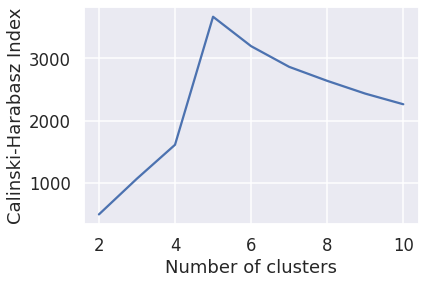

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [ ]:
k_means2 = KMeans(init= "k-means++", n_clusters=5, n_init=10, random_state = 42)
k_means2.fit(X)


KMeans(n_clusters=5, random_state=42)

In [ ]:
labels_k2 = k_means2.fit_predict(X)

In [ ]:
ch_index = calinski_harabasz_score(X, labels_k2)
print(ch_index)

3671.358018517615


## 1.2: Clustering Algorithm #2

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.3, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [ ]:
labels2 = dbscan.fit_predict(X)


In [ ]:
ch_index2 = calinski_harabasz_score(X, labels2)
print(ch_index2)

1291.3331343741309


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# The two hyperparameters to be tuned for DBSCAN is eps and min_samples. 
# min_samples is based on the 2*number of features
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

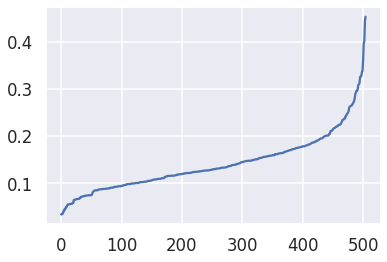

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:

dbscan2 = DBSCAN(eps = 0.3, min_samples = 8)
dbscan2.fit(X)

DBSCAN(eps=0.3, min_samples=8)

In [ ]:
labels3 = dbscan2.fit_predict(X)

In [ ]:
ch_index3 = calinski_harabasz_score(X, labels3)
print(ch_index3)

996.8843778962828


In [ ]:
dbscan3 = DBSCAN(eps = 0.5, min_samples = 8)
dbscan3.fit(X)

DBSCAN(min_samples=8)

In [ ]:
labels4 = dbscan3.fit_predict(X)

In [ ]:
ch_index4 = calinski_harabasz_score(X, labels4)
print(ch_index4)

3671.3580185176156


## 1.3 Model Comparison

Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.

For this smaller dataset, K-means is the better clustering algorithm. Although, both DBSCAN and K-means algorithms resulted in similar CH scores at the end, it required tuning two hyperparameters that were not intuitive for the DBSCAN algorithm to arrive at the final result.

K-means also provided an easier way to interpret the data, and by plotting the scores vs the number of clusters, it is apparent what is the ideal number of clusters for this data set. For the DBSCAN, it is still not apparent what are the number of clusters for this dataset. It would require running additional lines of code to determine this or get a visual picture of it.

For this size of data, speed was not a concern for either algorithm. 

Where the DBSCAN be superior to K-means, is for a data that had a lot of outliers and noise in it.



## 1.4 Personas

In [ ]:
from scipy import stats

pd.set_option("display.precision", 2) 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
col_names = df1.columns

In [ ]:
col_names

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [ ]:
import pandas as pd

X_df = pd.DataFrame(scaler.inverse_transform(X), columns=col_names)
X_df['Cluster'] = labels_k2


cl_group = X_df.groupby(['Cluster']).agg('describe')
cl_group



Age                                          Income            ...  \
         count  mean  std   min   25%   50%   75%   max  count      mean  ...   
Cluster                                                                   ...   
0       126.00 32.78 3.79 22.00 30.00 33.00 35.00 44.00 126.00 105265.81  ...   
1       157.00 59.96 3.38 51.00 58.00 59.00 62.00 68.00 157.00  72448.06  ...   
2       147.00 87.78 3.51 79.00 85.00 88.00 91.00 97.00 147.00  27866.10  ...   
3        50.00 24.18 3.66 17.00 22.00 24.50 27.00 31.00  50.00 128029.12  ...   
4        25.00 86.00 3.66 77.00 84.00 86.00 88.00 93.00  25.00 119944.04  ...   

        SpendingScore      Savings                                     \
                  75%  max   count     mean     std      min      25%   
Cluster                                                                 
0                0.34 0.41  126.00 14962.78 1061.73 12207.53 14223.79   
1                0.80 0.91  157.00  6889.97 1052.28  4077.66  6225.38   
2                0.36 0.47  147.00 16659.26 1183.85 13470.97 15957.28   
3                0.93 1.00   50.00  4087.52 1277.75     0.00  3275.32   
4                0.08 0.16   25.00 14808.68 1159.34 12554.69 14047.39   

                                    
             50%      75%      max  
Cluster                             
0       14976.94 15682.29 17968.55  
1        6845.06  7497.23 10547.78  
2       16711.07 17433.13 20000.00  
3        4361.97  4986.86  6089.48  
4       14773.41 15391.95 17833.09  

[5 rows x 32 columns]

In [ ]:

cl_group['Age']
cl_group['Income']
cl_group['SpendingScore']
cl_group['Savings']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00
1,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
2,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
3,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
4,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.00,105265.81,6080.62,89598.00,100760.25,106002.50,108858.75,119877.00
1,157.00,72448.06,6240.26,56321.00,68463.00,72027.00,76594.00,90422.00
2,147.00,27866.10,6448.81,12000.00,23361.00,27771.00,32601.00,46977.00
3,50.00,128029.12,5688.90,117108.00,123042.00,128162.00,131435.75,142000.00
4,25.00,119944.04,4941.05,110582.00,117347.00,119429.00,123651.00,128596.00


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.00,0.31,0.05,0.17,0.28,0.31,0.34,0.41
1,157.00,0.77,0.05,0.66,0.74,0.77,0.80,0.91
2,147.00,0.33,0.05,0.20,0.30,0.32,0.36,0.47
3,50.00,0.90,0.04,0.81,0.87,0.89,0.93,1.00
4,25.00,0.07,0.04,0.00,0.04,0.06,0.08,0.16


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,126.00,14962.78,1061.73,12207.53,14223.79,14976.94,15682.29,17968.55
1,157.00,6889.97,1052.28,4077.66,6225.38,6845.06,7497.23,10547.78
2,147.00,16659.26,1183.85,13470.97,15957.28,16711.07,17433.13,20000.00
3,50.00,4087.52,1277.75,0.00,3275.32,4361.97,4986.86,6089.48
4,25.00,14808.68,1159.34,12554.69,14047.39,14773.41,15391.95,17833.09


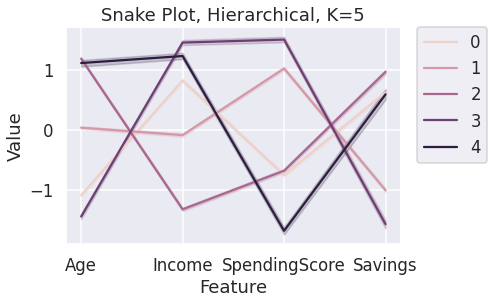

In [ ]:
X_df2 = pd.DataFrame(X, columns=col_names)
X_df2['Cluster'] = labels_k2


X_df_melt = pd.melt(X_df2,
    id_vars=['Cluster'],
    value_vars=['Age', 'Income', 'SpendingScore', 'Savings'],
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, Hierarchical, K=5');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


Cluster 0 - Persona A - Young, Up and Coming

Typical individuals in this group are young (average early 30s and max 44 years). They are high earners ($105K) with spending scores averaging around 0.31 which indicates potential to spend more. 

Cluster 1 - Persona B - Middle Aged Big Spender

Individuals in this group tend to be in their 50s, earns $72K on average but is a relatively high spender. This group does not have a lot in savings either (relatively, speaking). This group would be targeted by companies for their affinity to spend, despite their means. 

Cluster 2 - Persona C - Senior Saver 

This group is the oldest, has the highest savings and lowest income. Most likely these are individuals in senior homes living on fixed income.Their spending habits are middle of the pack.

Cluster 3 - Persona D - Young Money

This group is the youngest, earns the highest incomes, spends the most and saves the least. This group would be targeted by luxury brands. 

Cluster 4 - Persona E - Old Money

This group is fairly similar to Persona C in age, but differs significantly in income and spending habits. They have high incomes ($120K on average), but spends the least out of all groups. They also have a reasonable amount of savings.



# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule {juice box} -> {Made Good Granola bar} would have both high support and confidence as customers who buy juice boxes are likely to be parents who would be shopping for school snacks such as granola bars. Uncle Steve might find this rule interesting as he can start placing snacks and juice boxes together, making it convenient for shoppers who are parents of young kids. Similarly, Uncle Steve can be inspired to start profiling parents of young kids as a whole and ensure relevant product placement.

## 2.2: A rule that might have reasonably high support but low confidence.

The rule {Chocolate chip cookies} -> {apples} has high support but low confidence, as many baskets can contain these 'staples' but the consumption of chocolate chip cookies have nothing to do with applies, so it does not make a cookie buyer more likely to buy applies. Uncle Steve might find this rule useful, as he can advertise these items on a flyer together as a reminder for shoppers, since purchase of one item would not prompt the sale of another automatically for customers. Knowing these rules is helpful to make the right decisions when advertising grocery items.

## 2.3: A rule that might have low support and low confidence.

The rule {vinegar} -> {ice-cream tub} has low support since the likelihood of both of these items together in a lot of baskets is low due to the fact that ice-cream is seasonal item (in cold Ontario) and while vinegar is a staple in most households, it is not frequently purchased owing to its long shelf-life. The rule has low confidence as the consumption or usage of vinegar has nothing to do with that of ice-cream or vice versa. 

Uncle Steve might not find this rule as interesting, as he is not interested in products that are not as frequently purchased such as vinegar. On the flip side, knowing which products have low confidence is useful, when trying to advertise certain items in flyers. There is less ROI on promoting items that would have high confidence, since a customer would already have been inclined to purchase those items together.

## 2.4: A rule that might have low support and high confidence.

A rule {smoked salmon} and {cream cheese} has low support but high confidence; not every basket contains those two items together, but a customer who is buying smoked salmon is likely to purchase cream cheese.

Uncle Steve is likely well aware of this rule as it is such a winning combination. He could find it useful when working on his in-store signage.  He can place cream cheese tags (promotional signage) to remind customers to pick up cream cheese in the dairy aisle after they have picked up some smoked salmon. But note, that it does not work the other way: a customer picking up cream cheese may not be as inclined to shop for salmon. 

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [ ]:
X_train.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27


In [ ]:
X_train2 = X_train 
y_train2 = y_train

In [ ]:
print(X_train2['Purpose'].unique())

['Household' 'NewCar' 'UsedCar' 'Vacation' 'Other' 'Education' 'Repair'
 'Business']


In [ ]:
print(X_train2['City'].unique())

['New Roberttown' 'Ericmouth' 'East Jill' 'Lake Debra' 'North Judithbury'
 'Lisatown' 'West Michael' 'East Jessetown' 'Port Jesseville'
 'Robinsonshire' 'Lake Chad' 'Ramirezstad' 'Herrerafurt' 'North Noahstad'
 'Lake Roberto' 'New Kellystad' 'Cassandraton' 'New Jessica'
 'Jacquelineland' 'Port Keith']


In [ ]:
X_train2 = X_train2.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'City', 'DateOfBirth'], axis=1) #dropping features that are not useful or will deal with them later

In [ ]:
X_train2

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Purpose
3897,M,0,2,0,2,3329,0,12,Household
5628,F,0,0,2,2,2996,0,36,Household
1756,F,0,2,0,3,2470,0,24,NewCar
2346,F,0,2,1,2,3745,0,30,UsedCar
2996,M,0,0,1,3,3549,0,36,Vacation
...,...,...,...,...,...,...,...,...,...
3772,F,0,0,1,1,3607,1,24,NewCar
5191,F,0,2,1,0,3186,0,30,NewCar
5226,F,0,2,1,3,2387,1,36,Business
5390,F,0,1,1,3,3620,0,12,Other


In [ ]:
X_train2 = pd.get_dummies(X_train2, columns = ["Sex", "Purpose"], drop_first = True)

In [ ]:
X_train2

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,2,0,2,3329,0,12,1,0,1,0,0,0,0,0
5628,0,0,2,2,2996,0,36,0,0,1,0,0,0,0,0
1756,0,2,0,3,2470,0,24,0,0,0,1,0,0,0,0
2346,0,2,1,2,3745,0,30,0,0,0,0,0,0,1,0
2996,0,0,1,3,3549,0,36,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,3607,1,24,0,0,0,1,0,0,0,0
5191,0,2,1,0,3186,0,30,0,0,0,1,0,0,0,0
5226,0,2,1,3,2387,1,36,0,0,0,0,0,0,0,0
5390,0,1,1,3,3620,0,12,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state =25)
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_train2, y_train2, scoring="f1_micro" , cv=8))

[0.83833333 0.815      0.83333333 0.81666667 0.82       0.83
 0.81666667 0.84333333]


In [ ]:
mean_score = (cross_val_score(clf, X_train2, y_train2, scoring="f1_micro" , cv=8)).mean()
print(mean_score)

0.8266666666666667


## 3.2: Feature engineering

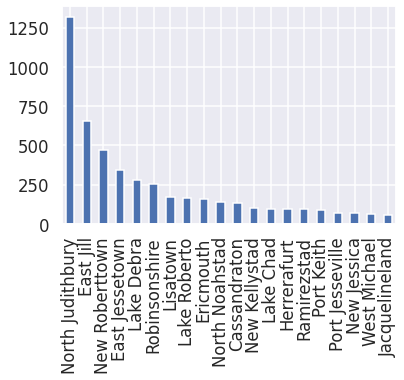

In [ ]:
X_train['City'].value_counts(sort=True).plot(kind='bar') 

In [ ]:
X_train['City'].value_counts(sort=True)

North Judithbury    1319
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Cassandraton         130
New Kellystad         99
Lake Chad             97
Herrerafurt           96
Ramirezstad           94
Port Keith            91
Port Jesseville       70
New Jessica           67
West Michael          64
Jacquelineland        56
Name: City, dtype: int64

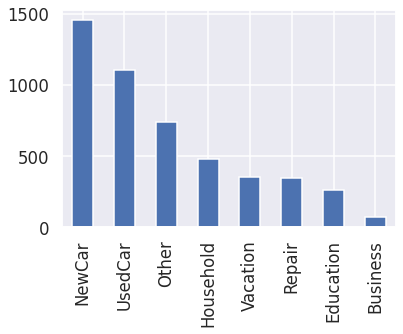

In [ ]:
X_train['Purpose'].value_counts(sort=True).plot(kind='bar') 

In [ ]:
X_train['Purpose'].value_counts(sort=True)

NewCar       1455
UsedCar      1102
Other         740
Household     478
Vacation      350
Repair        348
Education     258
Business       69
Name: Purpose, dtype: int64

Reviewing the distribution of 'Amount' - appears to be normal. No engineering required.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00f9956d0>]],
      dtype=object)

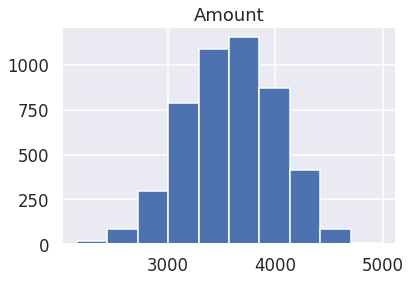

In [ ]:
X_train2.hist(column='Amount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00fa00110>]],
      dtype=object)

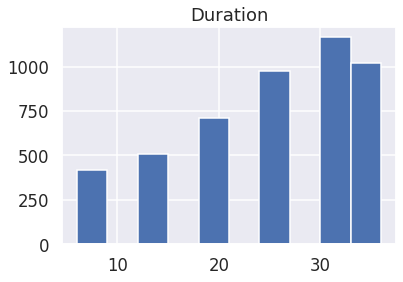

In [ ]:
X_train2.hist(column='Duration')

The below feature could be 'binned' - as there are some unique values with lower frequency.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00d408890>]],
      dtype=object)

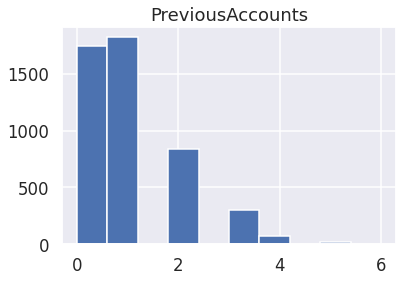

In [ ]:
X_train2.hist(column='PreviousAccounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd00d3d00d0>]],
      dtype=object)

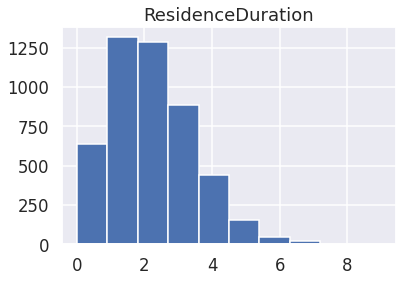

In [ ]:
X_train2.hist(column='ResidenceDuration')

In [ ]:
print(X_train2['ResidenceDuration'].unique())

[2 3 4 1 0 7 5 8 6 9]


In [ ]:
X_train3 = X_train

In [ ]:

X_train3 = X_train3.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1) #dropping features that are not useful 

Feature #1

In [ ]:
#high cardinality - reduce lower count values with Other
X_train3 = X_train3.replace('NewCar', 'Car')
X_train3



,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19
1756,F,0,2,0,3,2470,0,24,East Jill,Car,1975-02-17
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...
3772,F,0,0,1,1,3607,1,24,Robinsonshire,Car,1973-01-04
5191,F,0,2,1,0,3186,0,30,North Judithbury,Car,1973-12-25
5226,F,0,2,1,3,2387,1,36,Lake Roberto,Business,1969-02-25
5390,F,0,1,1,3,3620,0,12,Lake Debra,Other,1967-01-09


In [ ]:
X_train3 = X_train3.replace({'Purpose' : { 'UsedCar' : 'Car', 'Business' : 'Other'}})

In [ ]:
X_train3

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19
1756,F,0,2,0,3,2470,0,24,East Jill,Car,1975-02-17
2346,F,0,2,1,2,3745,0,30,Lake Debra,Car,1977-02-16
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...
3772,F,0,0,1,1,3607,1,24,Robinsonshire,Car,1973-01-04
5191,F,0,2,1,0,3186,0,30,North Judithbury,Car,1973-12-25
5226,F,0,2,1,3,2387,1,36,Lake Roberto,Other,1969-02-25
5390,F,0,1,1,3,3620,0,12,Lake Debra,Other,1967-01-09


In [ ]:
X_train3 = X_train3.drop(['City'], axis=1) #dropping features that are not useful 


In [ ]:
X_train3 = pd.get_dummies(X_train3, columns = ["Sex", "Purpose"], drop_first = True)

In [ ]:
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreviousDefault    4800 non-null   int64 
 1   NumberPets         4800 non-null   int64 
 2   PreviousAccounts   4800 non-null   int64 
 3   ResidenceDuration  4800 non-null   int64 
 4   Amount             4800 non-null   int64 
 5   Married            4800 non-null   int64 
 6   Duration           4800 non-null   int64 
 7   DateOfBirth        4800 non-null   object
 8   Sex_M              4800 non-null   uint8 
 9   Purpose_Education  4800 non-null   uint8 
 10  Purpose_Household  4800 non-null   uint8 
 11  Purpose_Other      4800 non-null   uint8 
 12  Purpose_Repair     4800 non-null   uint8 
 13  Purpose_Vacation   4800 non-null   uint8 
dtypes: int64(7), object(1), uint8(6)
memory usage: 365.6+ KB


FEature #2

In [ ]:
X_train3['year'] = pd.DatetimeIndex(X_train3['DateOfBirth']).year

In [ ]:
X_train3 = X_train3.drop(['DateOfBirth'], axis=1) #dropping features that are not useful 
X_train3

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,year
3897,0,2,0,2,3329,0,12,1,0,1,0,0,0,1970
5628,0,0,2,2,2996,0,36,0,0,1,0,0,0,1964
1756,0,2,0,3,2470,0,24,0,0,0,0,0,0,1975
2346,0,2,1,2,3745,0,30,0,0,0,0,0,0,1977
2996,0,0,1,3,3549,0,36,1,0,0,0,0,1,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,3607,1,24,0,0,0,0,0,0,1973
5191,0,2,1,0,3186,0,30,0,0,0,0,0,0,1973
5226,0,2,1,3,2387,1,36,0,0,0,1,0,0,1969
5390,0,1,1,3,3620,0,12,0,0,0,1,0,0,1967


In [ ]:
X_train3['age']= 2021 - X_train3['year'] #data is circa 2021

In [ ]:
X_train3 = X_train3.drop(['year'], axis=1) #dropping features that are not useful 
X_train3

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,age
3897,0,2,0,2,3329,0,12,1,0,1,0,0,0,51
5628,0,0,2,2,2996,0,36,0,0,1,0,0,0,57
1756,0,2,0,3,2470,0,24,0,0,0,0,0,0,46
2346,0,2,1,2,3745,0,30,0,0,0,0,0,0,44
2996,0,0,1,3,3549,0,36,1,0,0,0,0,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,3607,1,24,0,0,0,0,0,0,48
5191,0,2,1,0,3186,0,30,0,0,0,0,0,0,48
5226,0,2,1,3,2387,1,36,0,0,0,1,0,0,52
5390,0,1,1,3,3620,0,12,0,0,0,1,0,0,54


Feature #3

In [ ]:
# doing a min-max scaling (normalization) on the amounts to get a sense of how much an individual has in their bank relatively to others
from sklearn.preprocessing import MinMaxScaler

scaler_MM = MinMaxScaler()
scaler_MM.fit(X_train3[['Amount']])

X_train3['Amount_MinMax'] = scaler_MM.transform(X_train3[['Amount']])

X_train3



MinMaxScaler()

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,age,Amount_MinMax
3897,0,2,0,2,3329,0,12,1,0,1,0,0,0,51,0.41
5628,0,0,2,2,2996,0,36,0,0,1,0,0,0,57,0.30
1756,0,2,0,3,2470,0,24,0,0,0,0,0,0,46,0.11
2346,0,2,1,2,3745,0,30,0,0,0,0,0,0,44,0.56
2996,0,0,1,3,3549,0,36,1,0,0,0,0,1,45,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,3607,1,24,0,0,0,0,0,0,48,0.51
5191,0,2,1,0,3186,0,30,0,0,0,0,0,0,48,0.36
5226,0,2,1,3,2387,1,36,0,0,0,1,0,0,52,0.08
5390,0,1,1,3,3620,0,12,0,0,0,1,0,0,54,0.52


In [ ]:
X_train3 = X_train3.drop(['Amount'], axis=1) #dropping features that are not useful 

Feature #4

In [ ]:
from sklearn.preprocessing import FunctionTransformer

scaler_L = FunctionTransformer(np.log1p, validate = True)
scaler_L.fit(X_train3[['ResidenceDuration']])
X_train3['ResidenceDuration_log'] = scaler_L.transform(X_train3[['ResidenceDuration']])

FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

In [ ]:
X_train3 = X_train3.drop(['ResidenceDuration'], axis=1) #dropping features that are not usefu

In [ ]:
X_train3

,PreviousDefault,NumberPets,PreviousAccounts,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,age,Amount_MinMax,ResidenceDuration_log
3897,0,2,0,0,12,1,0,1,0,0,0,51,0.41,1.10
5628,0,0,2,0,36,0,0,1,0,0,0,57,0.30,1.10
1756,0,2,0,0,24,0,0,0,0,0,0,46,0.11,1.39
2346,0,2,1,0,30,0,0,0,0,0,0,44,0.56,1.10
2996,0,0,1,0,36,1,0,0,0,0,1,45,0.49,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,24,0,0,0,0,0,0,48,0.51,0.69
5191,0,2,1,0,30,0,0,0,0,0,0,48,0.36,0.00
5226,0,2,1,1,36,0,0,0,1,0,0,52,0.08,1.39
5390,0,1,1,0,12,0,0,0,1,0,0,54,0.52,1.39


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=100, random_state= 35)

In [ ]:
print(cross_val_score(clf3, X_train3, y_train2, scoring="f1_micro" , cv=8))
mean_score = (cross_val_score(clf3, X_train3, y_train2, scoring="f1_micro" , cv=8)).mean()
print(mean_score)

[0.89666667 0.85833333 0.88666667 0.88       0.90166667 0.86166667
 0.885      0.88666667]
0.8820833333333333


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf3, X_train3, y_train2, scoring="f1_micro" , cv=15)) #increasing CV to 15 to see score

[0.8875   0.871875 0.878125 0.8625   0.9      0.85625  0.86875  0.9375
 0.871875 0.9      0.8625   0.9      0.86875  0.89375  0.884375]


In [ ]:
mean_score2 = (cross_val_score(clf3, X_train3, y_train2, scoring="f1_micro" , cv=15)).mean()
print(mean_score2)

0.8829166666666668


In [ ]:
clf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 35,
 'verbose': 0,
 'warm_start': False}

Using Feature engineering increased the score by about 7% (0.826.. to 0.882). 

## 3.3: Feature selection

Using Variance Threshold - removing all low-variance features

In [ ]:
X_train4 = X_train3

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel = sel.fit(X_train4);

X_train_new = sel.transform(X_train4)

In [ ]:
X_train_new.shape

(4800, 8)

Left with 8 features after removing 6

In [ ]:
clf_fs = RandomForestClassifier(n_estimators=100, random_state= 25)


In [ ]:
print(cross_val_score(clf_fs, X_train_new, y_train2, scoring="f1_micro" , cv=15))

[0.840625 0.828125 0.85625  0.840625 0.83125  0.84375  0.828125 0.85625
 0.821875 0.8625   0.8375   0.8625   0.828125 0.846875 0.83125 ]


In [ ]:
mean_score_3 = (cross_val_score(clf_fs, X_train_new, y_train2, scoring="f1_micro" , cv=15)).mean()
print(mean_score_3)

0.8410416666666669


Feature selection #2

In [ ]:
X_train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PreviousDefault        4800 non-null   int64  
 1   NumberPets             4800 non-null   int64  
 2   PreviousAccounts       4800 non-null   int64  
 3   Married                4800 non-null   int64  
 4   Duration               4800 non-null   int64  
 5   Sex_M                  4800 non-null   uint8  
 6   Purpose_Education      4800 non-null   uint8  
 7   Purpose_Household      4800 non-null   uint8  
 8   Purpose_Other          4800 non-null   uint8  
 9   Purpose_Repair         4800 non-null   uint8  
 10  Purpose_Vacation       4800 non-null   uint8  
 11  age                    4800 non-null   int64  
 12  Amount_MinMax          4800 non-null   float64
 13  ResidenceDuration_log  4800 non-null   float64
dtypes: float64(2), int64(6), uint8(6)
memory usage: 365.6 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel = sel.fit(X_train4, y_train2)

In [ ]:
X_train_new2 = sel.transform(X_train4)

X_train_new2.shape


(4800, 10)

In [ ]:
clf_fs2 = RandomForestClassifier(n_estimators=100, random_state = 45)


In [ ]:
print(cross_val_score(clf_fs2, X_train_new2, y_train2, scoring="f1_micro" , cv=15))

[0.8875   0.8875   0.878125 0.85     0.890625 0.859375 0.85     0.903125
 0.871875 0.90625  0.8625   0.896875 0.853125 0.890625 0.878125]


In [ ]:
mean_score_4 = (cross_val_score(clf_fs2, X_train_new2, y_train2, scoring="f1_micro" , cv=15)).mean()
print(mean_score_4)

0.8777083333333334


Manual feature selection yielded in higher score vs variance threshold and SelectKBest

## 3.4: Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_param = {
    "n_estimators" : [100,115,130],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,20,4),
    'min_samples_leaf': range (1,10,20),
    'min_samples_split': range(2,10,2),
    'max_features': ['auto', 'log2']
}


In [ ]:
grid_search = GridSearchCV(estimator=clf3,param_grid=grid_param,cv=6, n_jobs=-1, verbose =2)

In [ ]:
grid_search.fit(X_train3,y_train2)

Fitting 6 folds for each of 240 candidates, totalling 1440 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=35), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 4),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10, 20),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 115, 130]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 130}

In [ ]:
grid_search.best_score_

0.8872916666666666

RandomizedSearchCV 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 40, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 5, 9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 4, 9]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 137, 225, 312, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 17, 25, 32, 40, None], 'min_samples_split': [4, 5, 9], 'min_samples_leaf': [6, 4, 9], 'bootstrap': [True, False]}


In [ ]:
search = RandomizedSearchCV(clf3, param_distributions= random_grid, n_iter=100, cv=8, verbose =2, random_state = 42, n_jobs= -1)

In [ ]:
search =search.fit(X_train3, y_train)

Fitting 8 folds for each of 100 candidates, totalling 800 fits


In [ ]:
search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 50}

In [ ]:
search.best_score_ 

0.8881249999999999

This was the best score so far, but it was only marginally better than the score of 0.882, which was achieved without any hyper parameter tuning. It might be possible to achieve a higher score with other combinations or slightly different ranges. 

## 3.5: Performance estimation

The test data has to undergo the same feature transformations as the training data. (Special attention paid to ensure it is transformed not fit).

In [ ]:
X_test3 = X_test
X_test3 

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
1782,435-05-4551,F,0,Tanya,Conner,1,1,3,4508 Crystal Rue Suite 173,HCY 571,3773,0,36,North Judithbury,NewCar,1970-10-15
3917,541-06-3756,F,0,Tammy,Brennan,0,0,3,6932 Stevenson Falls Suite 044,52A TE2,3412,0,24,Lake Roberto,UsedCar,1963-09-01
221,680-68-0713,F,0,Joanna,Johnson,2,2,0,833 Dunn Road,EWW 069,4146,0,24,West Michael,NewCar,1970-12-19
2135,853-48-9552,M,0,Nicholas,Richardson,2,1,1,81683 Hernandez Mission Suite 210,QPF-7410,3608,1,30,East Jessetown,UsedCar,1963-08-05
5224,147-43-5023,F,0,Megan,Jones,2,1,1,383 Wong Ferry,V 896714,2947,1,24,North Judithbury,NewCar,1978-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,083-57-2630,F,0,Patricia,Humphrey,0,1,0,69380 Ryan Lock Apt. 704,5K 9V3WDP,3133,0,30,Robinsonshire,Household,1971-04-27
1773,365-58-3990,F,0,Christina,Dalton,1,1,2,7238 Coleman Shores,6-77559B,3640,0,36,New Roberttown,Household,1975-12-26
2846,070-01-9780,M,0,David,Elliott,2,1,0,3287 Flores Junction,XQ4 0042,3918,1,30,North Judithbury,NewCar,1972-08-26
5799,200-44-4156,M,0,Johnny,Taylor,1,3,2,2374 Brian Extensions Suite 690,009N,3135,0,36,North Judithbury,Household,1969-04-27


In [ ]:
# Transforming test data
X_test3 = X_test3.drop(['UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate'], axis=1) #dropping features that are not useful 

X_test3 = X_test3.replace({'Purpose' : { 'UsedCar' : 'Car', 'NewCar': 'Car', 'Business' : 'Other'}})

In [ ]:
X_test3 = X_test3.drop(['City'], axis=1) #dropping features that are not useful

In [ ]:
X_test3

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Purpose,DateOfBirth
1782,F,0,1,1,3,3773,0,36,Car,1970-10-15
3917,F,0,0,0,3,3412,0,24,Car,1963-09-01
221,F,0,2,2,0,4146,0,24,Car,1970-12-19
2135,M,0,2,1,1,3608,1,30,Car,1963-08-05
5224,F,0,2,1,1,2947,1,24,Car,1978-05-11
...,...,...,...,...,...,...,...,...,...,...
2543,F,0,0,1,0,3133,0,30,Household,1971-04-27
1773,F,0,1,1,2,3640,0,36,Household,1975-12-26
2846,M,0,2,1,0,3918,1,30,Car,1972-08-26
5799,M,0,1,3,2,3135,0,36,Household,1969-04-27


In [ ]:
X_test3 = pd.get_dummies(X_test3, columns = ["Sex", "Purpose"], drop_first = True)

In [ ]:
X_test3

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,DateOfBirth,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation
1782,0,1,1,3,3773,0,36,1970-10-15,0,0,0,0,0,0
3917,0,0,0,3,3412,0,24,1963-09-01,0,0,0,0,0,0
221,0,2,2,0,4146,0,24,1970-12-19,0,0,0,0,0,0
2135,0,2,1,1,3608,1,30,1963-08-05,1,0,0,0,0,0
5224,0,2,1,1,2947,1,24,1978-05-11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,0,0,1,0,3133,0,30,1971-04-27,0,0,1,0,0,0
1773,0,1,1,2,3640,0,36,1975-12-26,0,0,1,0,0,0
2846,0,2,1,0,3918,1,30,1972-08-26,1,0,0,0,0,0
5799,0,1,3,2,3135,0,36,1969-04-27,1,0,1,0,0,0


In [ ]:
X_test3['year'] = pd.DatetimeIndex(X_test3['DateOfBirth']).year
X_test3 = X_test3.drop(['DateOfBirth'], axis=1) #dropping features that are not useful 
X_test3


,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,year
1782,0,1,1,3,3773,0,36,0,0,0,0,0,0,1970
3917,0,0,0,3,3412,0,24,0,0,0,0,0,0,1963
221,0,2,2,0,4146,0,24,0,0,0,0,0,0,1970
2135,0,2,1,1,3608,1,30,1,0,0,0,0,0,1963
5224,0,2,1,1,2947,1,24,0,0,0,0,0,0,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,0,0,1,0,3133,0,30,0,0,1,0,0,0,1971
1773,0,1,1,2,3640,0,36,0,0,1,0,0,0,1975
2846,0,2,1,0,3918,1,30,1,0,0,0,0,0,1972
5799,0,1,3,2,3135,0,36,1,0,1,0,0,0,1969


In [ ]:
X_test3['age']= 2021 - X_test3['year'] #data is circa 2021
X_test3 = X_test3.drop(['year'], axis=1) #dropping features that are not useful 
X_test3

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,age
1782,0,1,1,3,3773,0,36,0,0,0,0,0,0,51
3917,0,0,0,3,3412,0,24,0,0,0,0,0,0,58
221,0,2,2,0,4146,0,24,0,0,0,0,0,0,51
2135,0,2,1,1,3608,1,30,1,0,0,0,0,0,58
5224,0,2,1,1,2947,1,24,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,0,0,1,0,3133,0,30,0,0,1,0,0,0,50
1773,0,1,1,2,3640,0,36,0,0,1,0,0,0,46
2846,0,2,1,0,3918,1,30,1,0,0,0,0,0,49
5799,0,1,3,2,3135,0,36,1,0,1,0,0,0,52


In [ ]:
#transforming not fit

X_test3['Amount_MinMax'] = scaler_MM.transform(X_test3[['Amount']])


In [ ]:
X_test3 = X_test3.drop(['Amount'], axis=1) #dropping features that are not useful 


In [ ]:
X_test3['ResidenceDuration_log'] = scaler_L.transform(X_test3[['ResidenceDuration']])
X_test3 = X_test3.drop(['ResidenceDuration'], axis=1) #dropping features that are not useful
X_test3

,PreviousDefault,NumberPets,PreviousAccounts,Married,Duration,Sex_M,Purpose_Education,Purpose_Household,Purpose_Other,Purpose_Repair,Purpose_Vacation,age,Amount_MinMax,ResidenceDuration_log
1782,0,1,1,0,36,0,0,0,0,0,0,51,0.57,1.39
3917,0,0,0,0,24,0,0,0,0,0,0,58,0.44,1.39
221,0,2,2,0,24,0,0,0,0,0,0,51,0.70,0.00
2135,0,2,1,1,30,1,0,0,0,0,0,58,0.51,0.69
5224,0,2,1,1,24,0,0,0,0,0,0,43,0.28,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,0,0,1,0,30,0,0,1,0,0,0,50,0.35,0.00
1773,0,1,1,0,36,0,0,1,0,0,0,46,0.52,1.10
2846,0,2,1,1,30,1,0,0,0,0,0,49,0.62,0.00
5799,0,1,3,0,36,1,0,1,0,0,0,52,0.35,1.10


In [ ]:
from sklearn.metrics import confusion_matrix



The best model from the random grid search was used on the testing data. 

In [ ]:
y_pred = search.predict(X_test3)

confusion_matrix(y_test, y_pred)

array([[960,  31],
       [ 98, 111]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       991
           1       0.78      0.53      0.63       209

    accuracy                           0.89      1200
   macro avg       0.84      0.75      0.78      1200
weighted avg       0.89      0.89      0.88      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



Cost per Turbine
Cost Matrix (In $)

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2,500 | 20,000 |
| **Actual No Fail**   | 500 | 0 |



Total Cost Matrix for the Random Forest ML Model (In $)

|         | Predicted Fail           | Predicted No Fail  | 
| ------------- |------------| -----:|
| **Actual Fail**      | 502,500 | 1,100,000 | 
| **Actual No Fail**   | 25,000 | 0 | 25,000

Total cost is $1,627,500

Total Cost Matrix for RNN ML Model (In $) 

|         | Predicted Fail           | Predicted No Fail  | 
| ------------- |------------| -----:|
| **Actual Fail**      | 565,000 | 600,000 |  
| **Actual No Fail**   | 600,000 | 0 | 

Total cost is $1,765,000.



|         | Random Forest           | RNN  |
| ------------- |------------| -----:|
| **Accuracy**      | 100.0% | 99.5% |
| **Precision**   | 80.1% | 15.8% |
| **Recall**   | 78.5% | 88.3% |
| **F1**   | 79.3% | 26.9% |

Based on the cost per turbine matrix, we want to avoid a false negative scenario, whereby a model predicts that the turbine is in good health when infact it is not, resulting in a $20K cost outlay. 

The cost matrix for both models show that, it is important to consider the frequency of a false positive and a false negative. The random forest model overall produces a lower total cost, despite the higher false negative. This is due to the fact that the RNN model has a lower precision, where it predicts a higher false positive, and Uncle Steve has to incur $$500 to do the inspection, resulting in total costs of $600K total costs. Overall, the RNN model has total costs of $ 1,765,000, which is $137,500 higher than the random forest algorithm.

Another way of looking at it, is to calculate the 'unnecessary' costs that each of the models produced. RF: 25K + 1.1M = 1.125M. RNN: 600K + 600K = 1.2M. It would appear that the RNN model is slightly more costly.The F1 score also favours the Random Forest model. This will save Uncle Steve more money over the RNN model.



